In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split , cross_val_score
import warnings
warnings.filterwarnings('ignore')

# improt dataset
Our first step is to extract train and test data. We will be extracting data using pandas function read_csv. Specify the location to the dataset and import them.

In [2]:
#import datasets
path='diabetes.csv'
dataset=pd.read_csv(path)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#we can describtion dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#in this lession we can split dataset
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1:]
print('X shape : ',X.shape)
print('y shape : ',y.shape)

X shape :  (768, 8)
y shape :  (768, 1)


we can applying normalization  

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

# split dataset

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=44)

# K Nearest Neighbors
in this lession we well applying KNeighbors classifier

best accuracy :  0.7922077922077922
knn  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


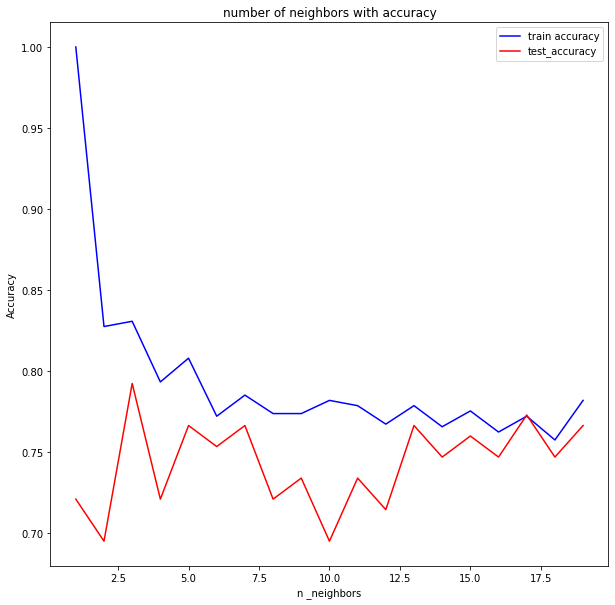

In [15]:
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
weights=['uniform','distance']
neig=range(1,20)
train_accuracy=[]
test_accuracy=[]
best_score=0.0
best_knn=None

for k in neig:
    KNN=KNeighborsClassifier(n_neighbors=k,algorithm='auto',weights='uniform')
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    train_score=KNN.score(X_train,y_train)
    test_score=accuracy_score(y_test,y_pred)
    # we can append accuracy in lists
    train_accuracy.append(train_score)
    test_accuracy.append(test_score)
    
    #we can save best accurcy in best_score
    if test_score > best_score :
        best_score=test_score
        best_knn=KNN

#we can plot the graph to show number of neighbors with accuracy
plt.figure(figsize=(10,10))
plt.plot(neig,train_accuracy,c='blue',label='train accuracy')
plt.plot(neig,test_accuracy,c='red',label='test_accuracy')
plt.legend()
plt.title('number of neighbors with accuracy')
plt.xlabel('n _neighbors')
plt.ylabel('Accuracy')

print('best accuracy : ',best_score)
print('knn ',best_knn)


